# Graph Data I/O - code along

## Introduction
Data for graphs and networks comes in many different representations. In this lesson, we shall look into loading data from "**Edge lists**" and "**Adjacency Matrix** to create graphs in networkx. We shall also look at different graph formats that networkx is compatible with. 

## Objectives
You will be able to:
* Create graphs in networkx using Adjacency matrices
* Create graphs in networkx using Edge Lists
* Understand Isomorphism and check if given graphs and Isomorphic
* Save networkx graphs in multiple graph formats

__Note__: Graph representations are related to, but not dependent upon the storage format. In our examples, we'll be loading our data from csv files. You may also have network data stored as `JSON`, `GEXF`, or other formats. For more details, [check the docs](https://networkx.github.io/documentation/latest/reference/readwrite/index.html).

## Grey's Anatomy "Romantic Encounters" Dataset
![greys anatomy](https://http2.mlstatic.com/greys-anatomy-13-14-temporadas-dublada-digital-D_NQ_NP_758571-MLB26104690139_102017-F.jpg)

Let's look at the data of all "romantic" encounters between characters on the TV show Grey's Anatomy. The dataset is available in the repo as `GA-edge.csv` as an edge list, and `GA-adj.csv` as an adjacency matrix. 

## Edge Lists
Edge lists are a common and efficient way of representing graph data. This format is made up of list of tuples, where each tuple represents an edge between two of the nodes in your graph. The nodes of the graph can be inferred by taking the set of objects from all tuples as shown in the image below.

![](edgelist.png)


- You can infer/determine whether a graph is directed or weighted from an edge list as a 3rd weight attribute can be added to each row. Similarly other edge attributes can also be saved under an edge list

- You can infer/determine whether a graph is directed or weighted from an edge list. For directed graphs, the tuples show a (to,from) tuple which identify the direction of the edge from "to" to "from".  



- __Weighted__: If edges appear more than once, or if an additional weight attribute is added as a 3rd column, the graph is weighted
- __Directed__: If the "From" and "To" (often seen as "Source" and "Target") of an edge in the list is not arbitrary, it's a directed graph

Let's load the Grey's anatomy romantic encounters edge list (undirected) as shown below:

```python
# Read the edge list as a list of lists (tuples)
import csv
edge_list = []
with open('GA-edge.csv', 'r') as f:
    data = csv.reader(f, delimiter=",", quotechar='"')
    next(data) # skips header row
    for row in data:
            edge_list.append(row)
edge_list
```

In [5]:
# Code here
# import the csv library to open csv files
import csv

# create and empty list to store edges
edge_list = []

# use with open to open the csv and automatically close when done.
# the 'r' is for read only
# as f is like importing librarys with an alias
with open('GA-edge.csv', mode='r') as f: 
    #create a variable to store each character definied by quotes("")
    data = csv.reader(f, delimiter=',', quotechar='"')
    # iterate through each word in csv and move onto the next character
    next(data)
    # for loop to append the rows into edge_list
    for row in data:
        edge_list.append(row)
edge_list

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres'],
 ['sloan', 'altman'],
 ['torres', 'arizona'],
 ['torres', 'karev'],
 ['derek', 'grey'],
 ['karev', 'izzie'],
 ["o'malley", 'izzie'],
 ['torres', "o'malley"],
 ['yang', 'colin'],
 ['yang', 'preston'],
 ['karev', 'kepner'],
 ['sloan', 'addison'],
 ['karev', 'addison'],
 ['derek', 'addison'],
 ['sloan', 'nancy'],
 ['karev', 'olivia'],
 ["o'malley", 'olivia'],
 ['grey', "o'malley"],
 ['karev', 'mrs. seabury'],
 ['chief', 'adele'],
 ['chief', 'ellis grey'],
 ['ellis grey', 'thatch grey'],
 ['susan grey', 'thatch grey'],
 ['bailey', 'tucker'],
 ['izzie', 'hank'],
 ['izzie', 'denny'],
 ['grey', 'finn'],
 ['grey', 'steve'],
 ['bailey', 'ben'],
 ['lexi', 'avery']]

So the tuples show the romantic encounters between different characters from the show. We can now load this edge list into networkx using `nx.from_edgelist()` method. Let's draw the network to visually inspect the information contained in the csv file. 

```python
# Load graph from edge list and draw the network
import networkx as nx
import matplotlib.pylab as plt
plt.figure(figsize=(8,7))
GA = nx.from_edgelist(edge_list)
nx.draw(GA, with_labels=True)
plt.show()
```

In [7]:
# Code here
import networkx as nx
import matplotlib.pyplot as plt

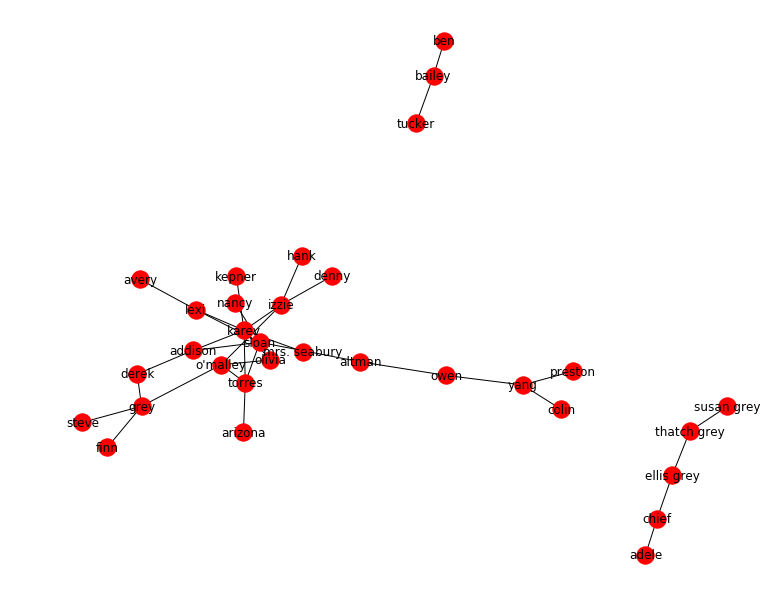

In [8]:
# create the figure for plotting with the given figure size
plt.figure(figsize=(10, 8))
# store the edgelist into the variable GA
GA = nx.from_edgelist(edge_list)
# draw the graph and show the lebsl for each edge
nx.draw(GA, with_labels=True)
plt.show()

## Adjacency Matrices

Adjacency Matrix is a 2D array of size n x n where n is the number of vertices in a graph. Let the 2D array be $adj[][]$, a slot $adj[i][j] = 1$ indicates that there is an edge from vertex i to vertex j. 

Adjacency matrix for undirected graph is always symmetric. Adjacency Matrix is also used to represent weighted graphs. If $adj[i][j] = w$, then there is an edge from vertex i to vertex j with weight w. Look at the example below:
<img src="g1.png" width=200>

Above graph can be shown using an adjacency matrix as shown here

<img src="am1.png" width=200>

Let's load the same dataset as above, but from an adjacency matrix this time around, instead of an edge list. We can use pandas for any of these methods to ease out the data loading task, as compared to using a csv reader. Let's see how to do this. 

```python
# Load the adjacency matrix as pandas dataframe
import pandas as pd
GA_adj = pd.read_csv('GA-adj.csv', index_col=0)
GA_adj
```

In [9]:
# Code here'
# import the pandas library
import pandas as pd
GA_adj = pd.read_csv('GA-adj.csv', index_col=0)
GA_adj

,denny,kepner,grey,colin,finn,thatch grey,derek,nancy,tucker,hank,...,karev,ben,preston,yang,sloan,torres,addison,bailey,susan grey,izzie
denny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
kepner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
colin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thatch grey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
derek,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
nancy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
tucker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
hank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Here we see a 32x32 matrix, showing the possible connections between the characters with a '1' in the intersection. We can now extract the matrix information from the dataframe as an array of values only.

```python
# Convert adjacency data into numpy array
GA_adj_arr = GA_adj.values
print(GA_adj_arr)
type(GA_adj_arr)
```

In [14]:
# Code here
# To create an adjacency matrix we can take all the values from the datafram
# pandas.values method will return a numpy array with the values in the dataframe
GA_adj_arr = GA_adj.values
print(type(GA_adj))
print(GA_adj.values)

<class 'pandas.core.frame.DataFrame'>
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Great, now we can load this multidimensional array as a graph using `nx.from_numpy_matrix()` method and visualize it as before.

```python
# Draw a graph from numpy matrix
GAAdj = nx.from_numpy_matrix(GA_adj_arr)
nx.draw(GAAdj, with_labels=True)
```

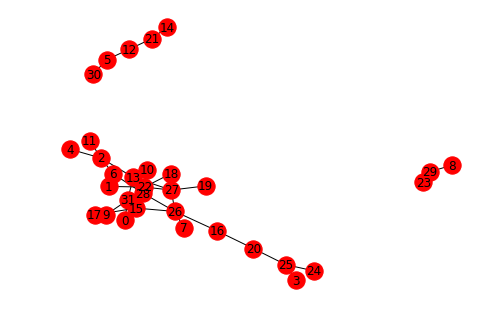

In [16]:
# Code here
GAAdj = nx.from_numpy_matrix(GA_adj_arr)
nx.draw(GAAdj, with_labels=True)

Okie so we can see that we have lost our labels i.e. characters names. This information needs to be imported from the dataframe and create a label mapping dictionary. The `nx.relabel_nodes()` method can be used to remap nodes labels (or any other attributes) as we see below. 

```python
# Relabel the graph nodes with column names from dataframe
label_mapping = dict(zip(GAAdj.nodes(), GA_adj.columns))
GAAdj = nx.relabel_nodes(GAAdj, label_mapping)
plt.figure(figsize=(10,7))
nx.draw(GAAdj, with_labels=True)
```

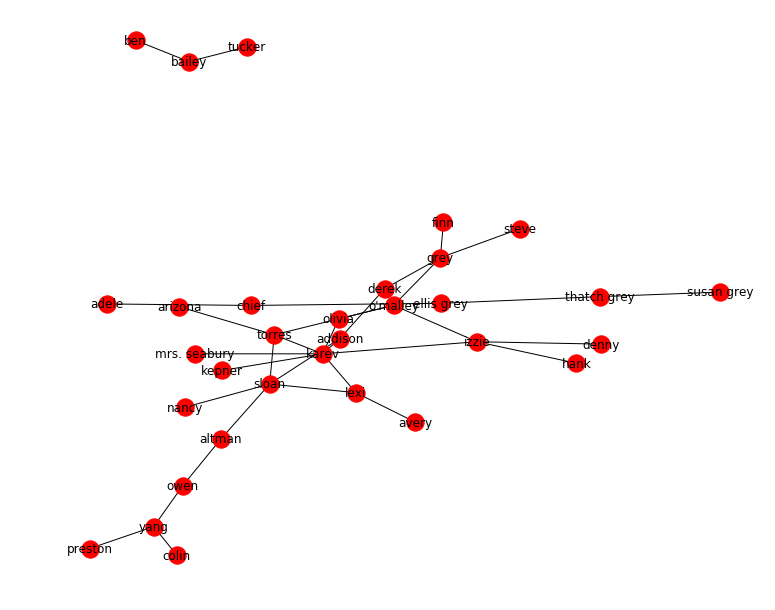

In [17]:
# Code here
# Importing the arrays from a dataframe will lose the labels you can add them using the nx.relabel_nodes() method
# crate the mask for the labels which is a dictionary
# takes the nodes from the graph and the columns from the dataframe and combines in a dict using the zip function
# the zip function acts like a zipper by combining the two sides together
label_mapping = dict(zip(GAAdj.nodes(), GA_adj.columns))
# since there is no inplace attribute like in pandas you'll need to reassign the relabel back to the variable
GAAdj = nx.relabel_nodes(GAAdj, label_mapping)
# create a graph using matplotlib
plt.figure(figsize=(10, 8))
nx.draw(GAAdj, with_labels=True)
plt.show()

### Are above graphs exactly the same ?

For simple graphs as we drew above from adjacency matrix and edge list , we can probably visually inspect them and work out if they are same or not. One easy way to do this in code is to compare the number of nodes, edges and average degree of the network. 

```python
# Do a quick comparison between two graphs

print("Edge List Graph\n", nx.info(GA))
print("\n Adjacency Matrix Graph\n", nx.info(GAAdj))
```

In [18]:
# Code here
print(f'Edge List Graph\n{nx.info(GA)}')
print(f'\nAdjacency Matrix Graph\n{nx.info(GAAdj)}')

Edge List Graph
Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adjacency Matrix Graph
Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250



## Graph Isomorphism 
Let's look at a more sophisticated, analytical approach to see if above graphs are indeed the same.  A graph can exist in different forms having the same number of vertices, edges, and also the same edge connectivity. Such graphs are called **Isomorphic Graphs**. 
Two graphs G1 and G2 are said to be isomorphic if:

- Their number of components (vertices and edges) are same.
- Their edge connectivity is retained.

We can check for Isomorphism in networkx using `nx.is_isomorphic()` boolean method, which returns a true or false accordingly.

```python
# Check for graph isomorphism 
print("Are these graphs Isomorphic?", nx.is_isomorphic(GA, GAAdj))
```

In [19]:
# Code here
# to check if the two graphs are isomorhpic use the method is_isomorphic(graph1, graph2
print(f'Are these graphs isomprhic? {nx.is_isomorphic(GA, GAAdj)}')

Are these graphs isomprhic? True


### Exporting Graphs
Networkx can read and write graphs to different formats. Visit the link provided at the beginning of this lesson to view details on these formats and methods to handle different formats. Here is a list of some common formats (other than adj. matrix and edge lists) that we can process in networkx.
- GML
- Pickle
- GraphML
- YAML
- Pajek
- GEXF
- LEDA
- SparseGraph6
- GIS Shapefile

Let's export our graph in `GEXF` (Graph Exchange XML Format), used by popular graphing platforms like `gephi`.

```python
# Write graph as gexf
nx.write_gexf(GA, 'GA_graph.gexf')
```

In [20]:
# Code here 
# graphs can be exported into different formats
nx.write_gexf(GA, 'GA_graph.gexf')# the first argument is the variable to export, and the second is the name of the file

## Summary 
In this code along, we looked at importing graph data from edge lists and adj. matrix. We looked at loading data from these formats into a networkx graph using buult in methods. We also looked at isomorphism to compare two graphs for equality. Finally we looked at exporting a networkx graph into one of the many formats supported by networkx.